In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../include/")
import hhtools
import hhsignal

import importlib
from tqdm.notebook import tqdm

# Check single sample

In [ ]:
def load_single_sample(fdir):
    import os
    data = {}
    data['step_spk'], _ = hhtools.load_spk(os.path.join(fdir, "spk.dat"))
    data['deg_in'], data['weight_in'] = hhtools.load_network(os.path.join(fdir, "ntk.txt"))
    data["vlfp"], data["fs"] = hhtools.load_vlfp(os.path.join(fdir, "lfp.dat"))
    data["result"] = hhtools.read_summary(os.path.join(fdir, "result.txt"))
    return data
    

In [ ]:
data = load_single_sample("tmp")

In [ ]:
plt.figure()
hhtools.draw_spk(data["step_spks"])
plt.show()

In [ ]:
.

In [ ]:
obj.summary["chi"].shape

In [ ]:
obj.control_names

In [ ]:
y = obj.controls["w_set"]
x = obj.controls["p_set"]

nid = 9

clims = [[0, 1],
         [0, 10],
         [0, 1.5]]

obj = hhtools.SummaryLoader("./single_sample/")

plt.figure(figsize=(14, 4))
for n, tag in enumerate(["chi", "frs_m", "cv"]):
    plt.subplot(1, 3, n+1)
    im = np.average(obj.summary[tag][1:,1:,nid,:,2], axis=2)
    hhtools.imshow_xy(im, x=x, y=y, cmap="jet", vmin=clims[n][0], vmax=clims[n][1])
    plt.colorbar()
    plt.xlabel("p", fontsize=14)
    plt.ylabel("w", fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
y = obj.controls["w_set"]
x = obj.controls["ic_set"]

nid = 10
print(obj.controls["p_set"][nid])

clims = [[0, 1],
         [0, 100],
         [0, 1.5]]

plt.figure(figsize=(14, 4))
for n, tag in enumerate(["chi", "frs_m", "cv"]):
    plt.subplot(1, 3, n+1)
    im = np.average(obj.summary[tag][:,nid,:,:,2], axis=2)
    hhtools.imshow_xy(im, x=x, y=y, cmap="jet", vmin=clims[n][0], vmax=clims[n][1])
    plt.colorbar()
    plt.xlabel("ic", fontsize=14)
    plt.ylabel("w", fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
y = obj.controls["w_set"]
x = obj.controls["ic_set"]

nid = 18

clims = [[0, 1],
         [0, 100],
         [0, 1.5]]

plt.figure(figsize=(14, 4))
for n, tag in enumerate(["chi", "frs_m", "cv"]):
    plt.subplot(1, 3, n+1)
    im = np.average(obj.summary[tag][:,nid,:,:,2], axis=2)
    hhtools.imshow_xy(im, x=x, y=y, cmap="jet", vmin=clims[n][0], vmax=clims[n][1])
    plt.colorbar()
    plt.xlabel("ic", fontsize=14)
    plt.ylabel("w", fontsize=14)

plt.tight_layout()
plt.show()

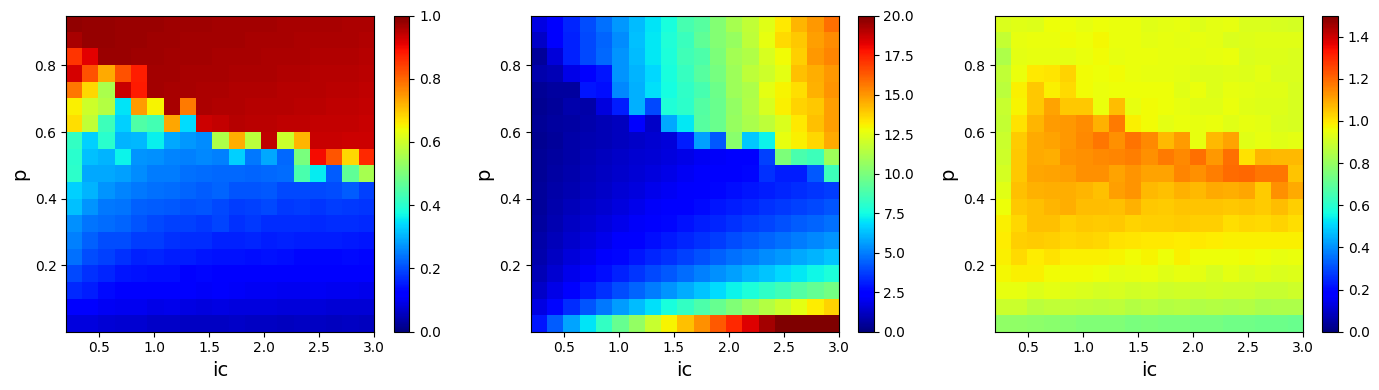

In [341]:
y = obj.controls["p_set"]
x = obj.controls["ic_set"]

nid = 6

clims = [[0, 1],
         [0, 20],
         [0, 1.5]]

plt.figure(figsize=(14, 4))
for n, tag in enumerate(["chi", "frs_m", "cv"]):
    plt.subplot(1, 3, n+1)
    im = np.average(obj.summary[tag][nid,1:,1:,:,2], axis=2)
    hhtools.imshow_xy(im, x=x, y=y, cmap="jet", vmin=clims[n][0], vmax=clims[n][1], interpolation="none")
    plt.colorbar()
    plt.xlabel("ic", fontsize=14)
    plt.ylabel("p", fontsize=14)

plt.tight_layout()
plt.show()

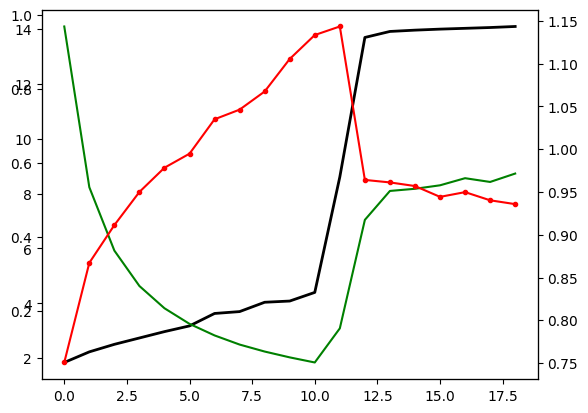

In [340]:
nid = 6

plt.figure()
plt.plot(np.average(obj.summary["chi"][nid,1:,10,:,2], axis=1), c="k", lw=2, zorder=10, label="sync order param")
plt.twinx()
plt.plot(np.average(obj.summary["frs_m"][nid,1:,10,:,2], axis=1), c="g", label="firing rate")
plt.twinx()
plt.plot(np.average(obj.summary["cv"][nid,1:,10,:,2], axis=1), ".-", c="r", label="CVS")

In [ ]:
n = np.argmax(np.average(obj.summary["cv"][nid,1:,10,:,2], axis=1))
print(n)

## Track single line 

In [327]:
nid = [6, 12, 10, 0]
data = obj.load_detail(*nid)

In [328]:
print(obj.summary["chi"][6, 12, 10, 0], obj.summary["frs_m"][6, 12, 10, 0], obj.summary["cv"][6, 12, 10, 0])

[0.867138      nan 0.867138] [4.483331 0.       4.483331] [ 1.077696 -1.        1.077696]


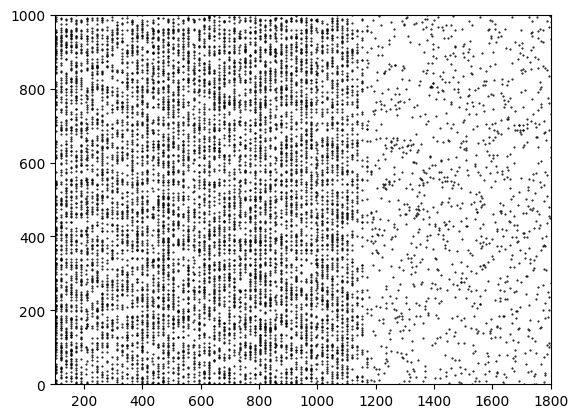

In [339]:
plt.figure()
hhtools.draw_spk(data["step_spk"])
plt.xlim([100, 1800])
plt.show()

In [ ]:
data.keys()

In [237]:
data.keys()

dict_keys(['step_spk', 'vlfp', 'ts', 'info'])

In [330]:
def get_cluster(bools):
    # cluster True values
    clusters = [[None, None]] # save Start and End index
    
    find_end = False
    for n in range(len(bools)):
        if not find_end and bools[n]:
            clusters[-1][0] = n
            find_end = True
            
        if find_end and not bools[n]:
            clusters[-1][1] = n+1
            clusters.append([None, None])
            find_end = False
            
    return clusters[:-1]

In [331]:
dt = 0.01
tol_t = 1

num_total_spks = np.sum([len(spk) for spk in data["step_spk"]])
concat_spikes = np.zeros(num_total_spks, dtype=int)
cell_id = np.zeros(num_total_spks, dtype=int)

stack = 0
for n, spk in enumerate(data["step_spk"]):
    num = len(spk)
    concat_spikes[stack:stack+num] = spk
    cell_id[stack:stack+num] = n
    stack += num
    
# align
nid_sort = np.argsort(concat_spikes)
concat_spikes = concat_spikes[nid_sort]
cell_id = cell_id[nid_sort]

# get spike difference
dn = concat_spikes[1:] - concat_spikes[:-1]
cluster_ids = get_cluster(dn < tol_t / dt)

In [332]:
cluster_sizes = [c[1] - c[0] for c in cluster_ids]

In [333]:
def log_binning(vals, a0=1, r=1.2):
    if r <= 1:
        raise ValueError("r must be larger than 1")
    
    vals = np.array(vals)
    
    max_val = max(vals)
    edges = [a0]
    bins = []
    
    a = a0*r
    while a < max_val:
        bins.append(np.sum((vals >= a0) & (vals < a)))
        edges.append(a)
        a0 = a
        a *= r 
        
    return bins, edges

In [336]:
bins, edges = log_binning(cluster_sizes, a0=2.1, r=1.1)

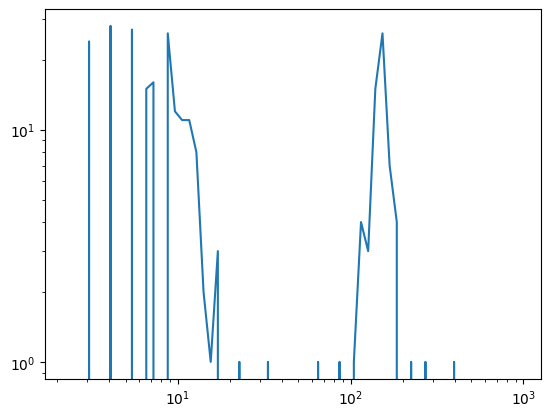

In [338]:
plt.figure()
plt.plot(edges[1:], bins)
plt.yscale("log")
plt.xscale("log")
# plt.xlim([0, 10])

plt.show()

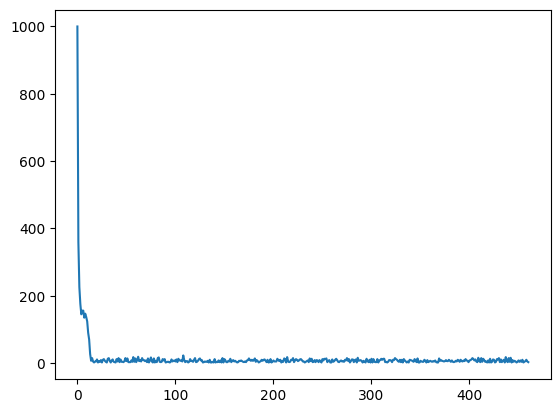

In [326]:
plt.plot(cluster_sizes)

In [319]:
np.sum(np.array(cluster_sizes) > 2.1)

38

In [261]:
edges

[1]

(array([496.,   8.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   2. ,  101.8,  201.6,  301.4,  401.2,  501. ,  600.8,  700.6,
         800.4,  900.2, 1000. ]),
 <BarContainer object of 10 artists>)

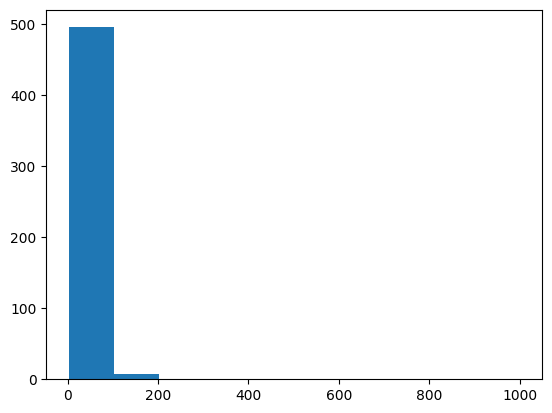

In [250]:
plt.hist(cluster_sizes)

In [228]:
num_total_spks

6205

In [ ]:
# spike clustering, check how many cells participated in these clusters
# collect all spikes


In [ ]:
t = data["ts"] * 1e3
idt = (t >= 500)

plt.figure(figsize=(9, 3))
plt.plot(t[idt], data["vlfp"][2][idt])
plt.xlim([1500, 2000])
plt.show()

In [ ]:
yf, f = hhsignal.get_fft(data["vlfp"][2][idt], 2000, frange=(2, 200))

In [ ]:
plt.figure()
plt.plot(f, yf)
plt.show()

In [ ]:
psd, fpsd, tpsd = hhsignal.get_stfft(data["vlfp"][2][idt], data["ts"][idt], 2000, frange=(2, 200))
plt.figure()
hhtools.imshow_xy(psd, x=tpsd, y=fpsd, cmap="jet")
plt.show()

In [ ]:
plt.plot(data["ts"][idt])

In [ ]:
data["ts"][idt][-1]